In [ ]:
import pandas
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import load_model


import matplotlib.pyplot as plt
%matplotlib inline

##Loading Data


In [ ]:
...
# load dataset
df = pandas.read_excel("/content/drive/MyDrive/Colab Notebooks/Meth_Exergy/exergy_data.xlsx")
data = df[['Feed Temperature', 'Feed Rate', 'Dist. Comp.', 'Bottom Comp.', 'Efficiency']].sample(frac=1)
X = data.iloc[0:200,0:4].values
Y = data.iloc[0:200,4].values
x_test = data.iloc[200:241, 0:4].values
y_test = data.iloc[200:241, 4].values

In [ ]:
print(X)

In [ ]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
def evaluate_model(y_test, prediction):
    train_error = np.abs(y_test - prediction)
    mean_error = np.mean(train_error)
    max_error = np.max(train_error)
    min_error = np.min(train_error)
    standard_deviation = np.std(train_error)
    print(f'Mean Error = {mean_error} \nMax Error = {max_error}\nMin Error = {min_error}\nStandard Deviation = {standard_deviation}')

In [ ]:
# define your custom callback for prediction
class PredictionCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    raw_pred = self.model.predict(x_test)
    print(raw_pred)
    y_pred = []
    for i in raw_pred:
        y_pred.append(i[0])
    epochs_predictions.append(y_pred)    
    #plt.savefig('/content/drive/MyDrive/Colab Notebooks/pngs/1.png')

# ...

# register the callback before training starts
# model.fit(X_train, y_train, batch_size=32, epochs=25, 
#           validation_data=(X_valid, y_valid), 
#           callbacks=[PredictionCallback()])

In [ ]:
r_model = baseline_model()

In [ ]:
r_model.fit(x=X, y=Y, epochs=100,  batch_size=5, verbose=1)

In [ ]:
predictions= r_model.predict(x_test)

In [ ]:
evaluate_model(y_test, predictions)

In [ ]:
def plot_predictions(prediction, y_test=y_test):
    plt.style.use('default')
    plt.figure(figsize=(20,5))
    #plt.plot(train_error)
    plt.plot(prediction)
    plt.plot(y_test)
    plt.show()

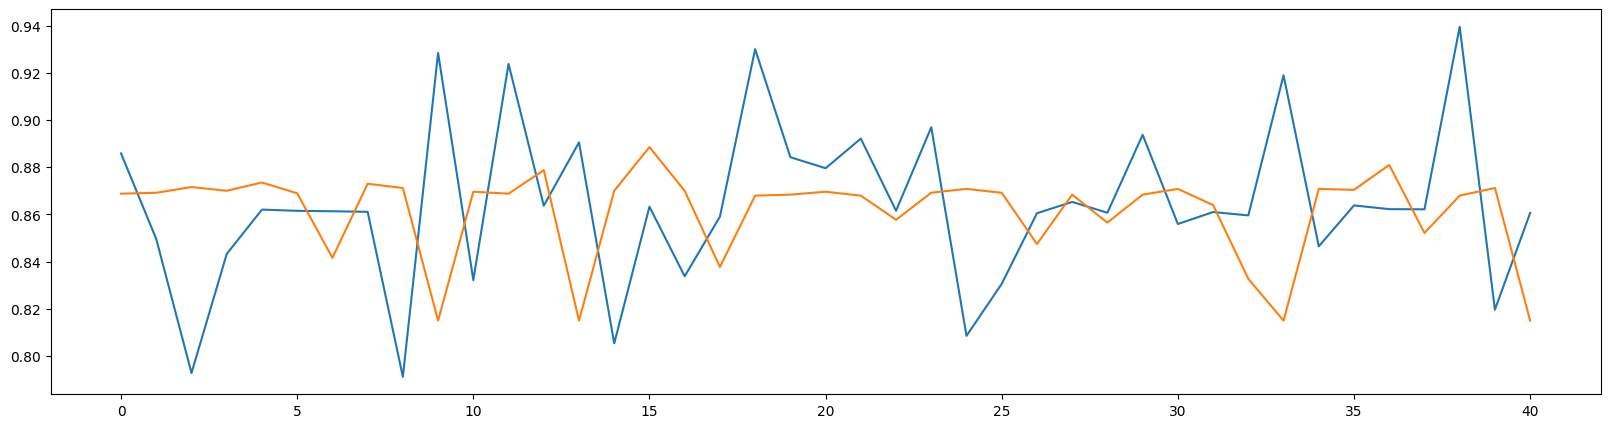

In [ ]:
plot_predictions()

#Larger Model

In [ ]:
def larger_model():
    model = Sequential()
    model.add(Dense(20, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model = larger_model()
model.fit(x=X, y=Y, epochs=100, verbose=1, batch_size=10)

In [ ]:
prediction = model.predict(x_test)

In [ ]:
evaluate_model(y_test, prediction)

In [ ]:
plot_predictions(prediction, y_test)

#Standardizing X and Y


In [ ]:
print(X)

In [ ]:
scaler_X = StandardScaler().fit(X)

In [ ]:
scaled_X = scaler_X.transform(X)
print(scaled_X)

In [ ]:
reshaped_Y = Y.reshape(len(Y), 1)
print(reshaped_Y)

In [ ]:
scaler_Y = StandardScaler().fit(reshaped_Y)

In [ ]:
scaled_Y = scaler_Y.transform(reshaped_Y)
print(scaled_Y)

In [ ]:
model = larger_model()

In [ ]:
model.fit(x=scaled_X, y=scaled_Y, epochs=150, batch_size=10, verbose=1)

In [ ]:
prediction_last = scaler_Y.inverse_transform(model.predict(scaler_X.transform(x_test)))

In [ ]:
print(prediction_last, y_test)

In [ ]:
evaluate_model(y_test, prediction_last)

Mean Error = 0.017493884945471206 
Max Error = 0.07415982240451136
Min Error = 1.1634509418101402e-06
Standard Deviation = 0.01938852667805242


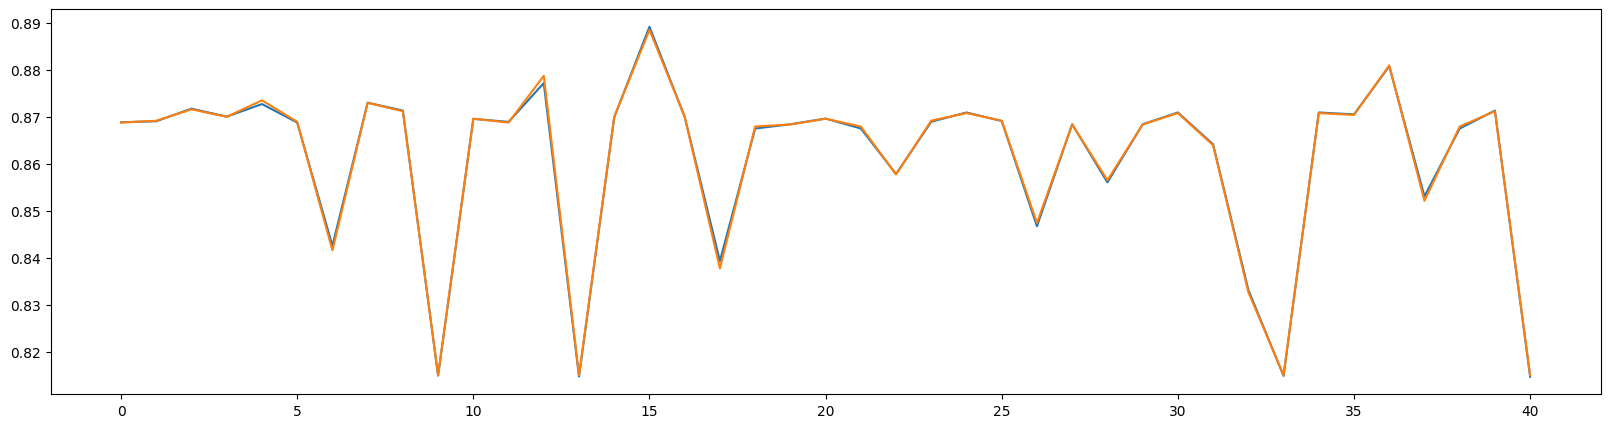

In [ ]:
plot_predictions(prediction_last, y_test)

### **1. model.save()**


In [ ]:
# Check first to see if file exists already.
# if not, the model is saved to disk.
import os.path
if os.path.isfile('/content/drive/MyDrive/Colab Notebooks/Meth_Exergy/methanol_water_exergy_efficiency.h5') is False:
  model.save('/content/drive/MyDrive/Colab Notebooks/Meth_Exergy/methanol_water_exergy_efficiency.h5')